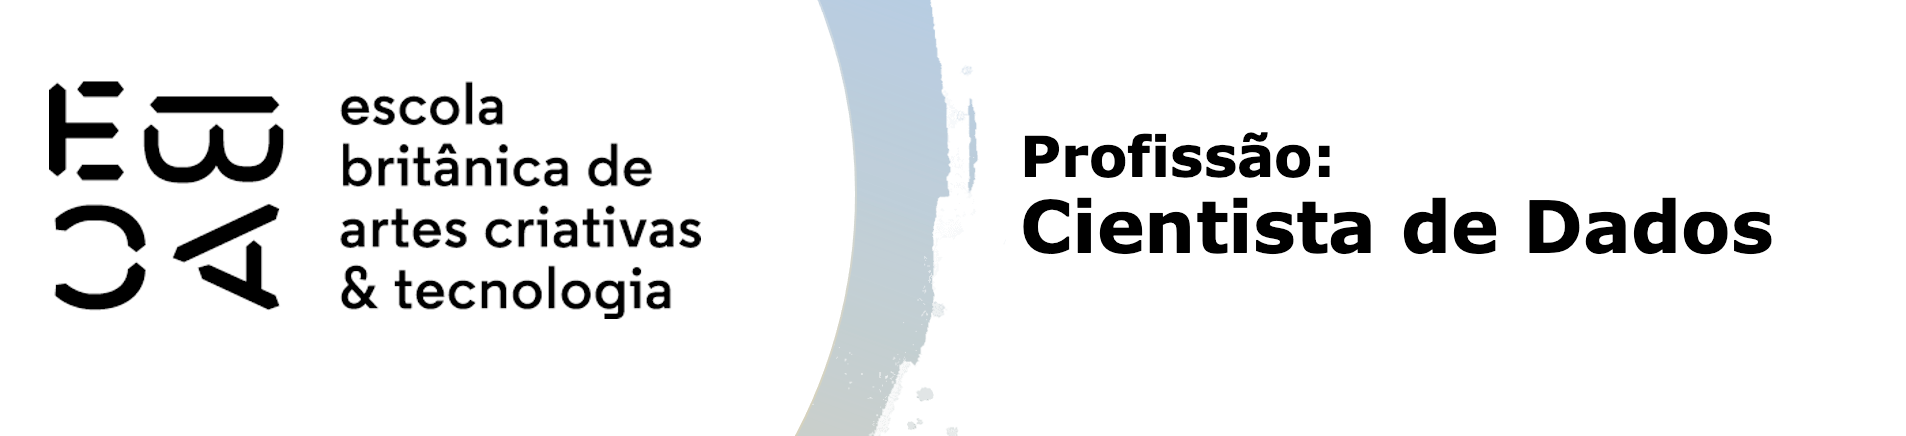

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from tqdm.notebook import tqdm

In [208]:
df = pd.read_csv('online_shoppers_intention.csv')

df1 = df.select_dtypes(include="number") #selecionar somente as variáveis com float e int
df1 = pd.DataFrame(StandardScaler().fit_transform(df1), columns = df1.columns) # variável com os dados já padronizados
df1['Revenue'] = df['Revenue']

In [318]:
df1.head()
#df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,Revenue,grupos_2,grupos_3,grupos_4,grupos_5,grupos_6,grupos_7,grupos_8,grupos_9,grupos_10,BounceRates,br_class,g3_nomes
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,False,grupo_1,grupo_0,grupo_0,grupo_1,grupo_0,grupo_0,grupo_4,grupo_0,grupo_0,3.667189,large rate,Surfistas socráticos
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,False,grupo_1,grupo_0,grupo_0,grupo_1,grupo_0,grupo_0,grupo_4,grupo_0,grupo_0,-0.457683,small rate,Surfistas socráticos
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,False,grupo_1,grupo_0,grupo_0,grupo_1,grupo_0,grupo_0,grupo_4,grupo_0,grupo_0,3.667189,large rate,Surfistas socráticos
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,False,grupo_1,grupo_0,grupo_0,grupo_1,grupo_0,grupo_0,grupo_4,grupo_0,grupo_0,0.573535,large rate,Surfistas socráticos
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,False,grupo_1,grupo_0,grupo_0,grupo_1,grupo_0,grupo_0,grupo_4,grupo_0,grupo_0,-0.045196,large rate,Surfistas socráticos


## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [53]:
# num momento futuro precisarei de selecionar as variáveis a serem analisadas. daí já deixei aqui
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [210]:
#criando a lista com as variaveis selecionadas para análise
variaveis = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration']

#Criando dfs com as variáveis selecionadas
#  SUbset da tabela original
df2 = df[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
          'BounceRates','Revenue']]

#  Subset da tabela padronizada
df1 = df1[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
          'BounceRates','Revenue']]

C:\Users\leand\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\leand\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\leand\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\leand\A

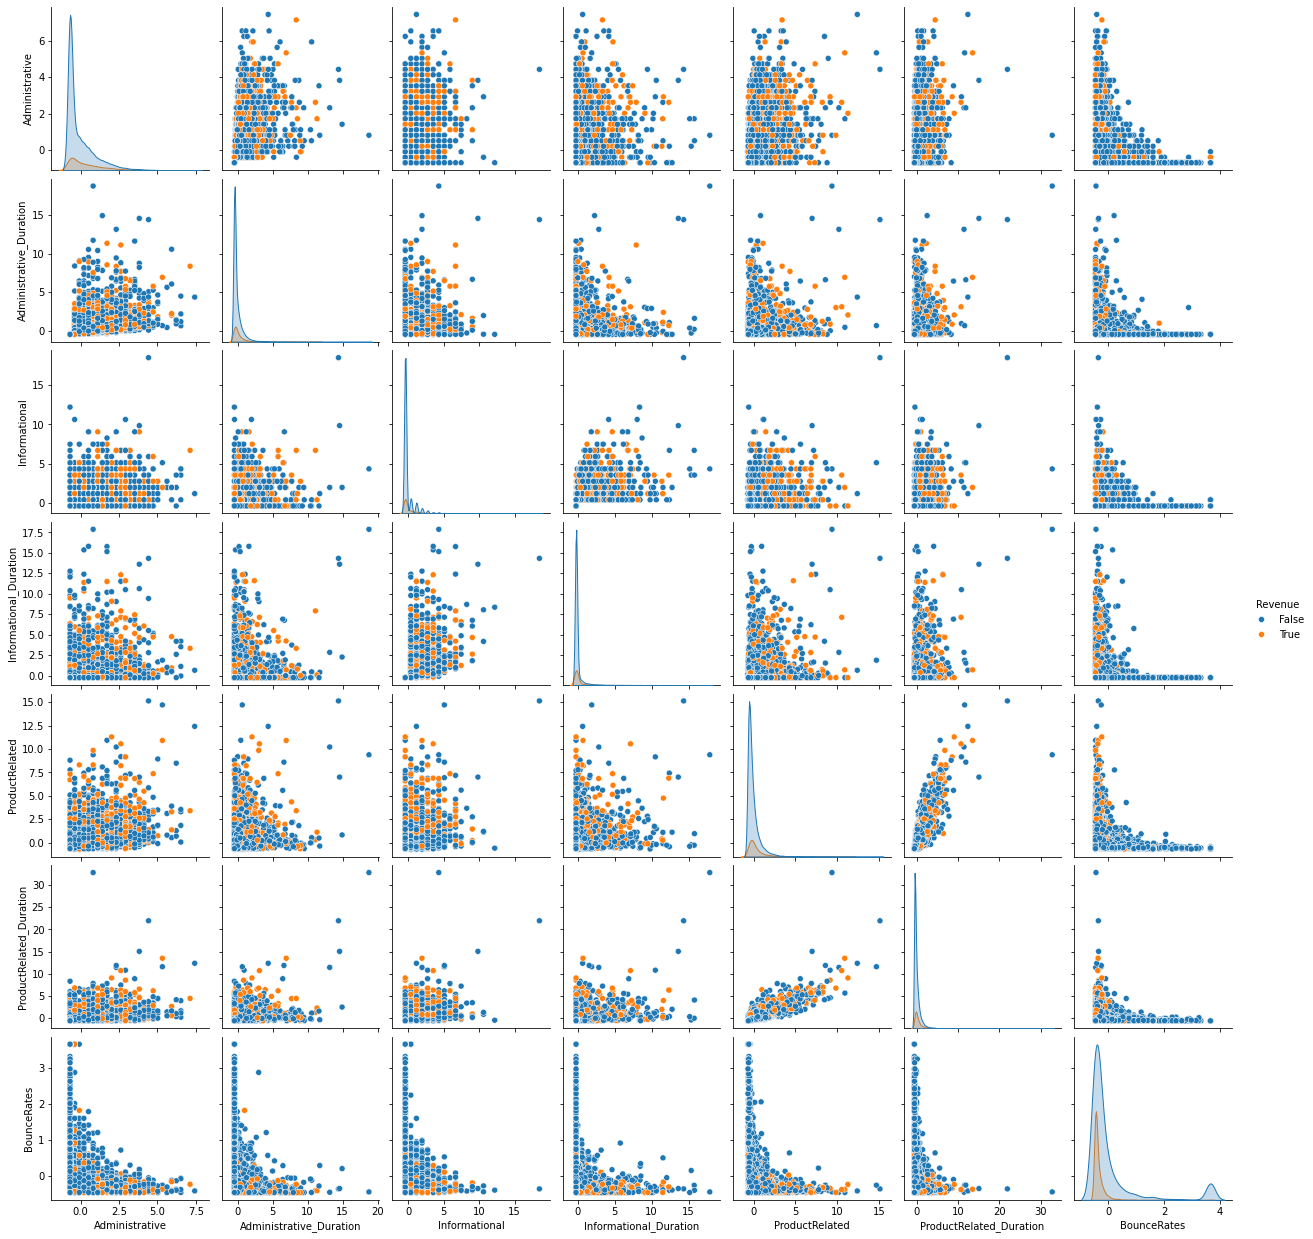

In [173]:
sns.pairplot(df1, hue='Revenue')

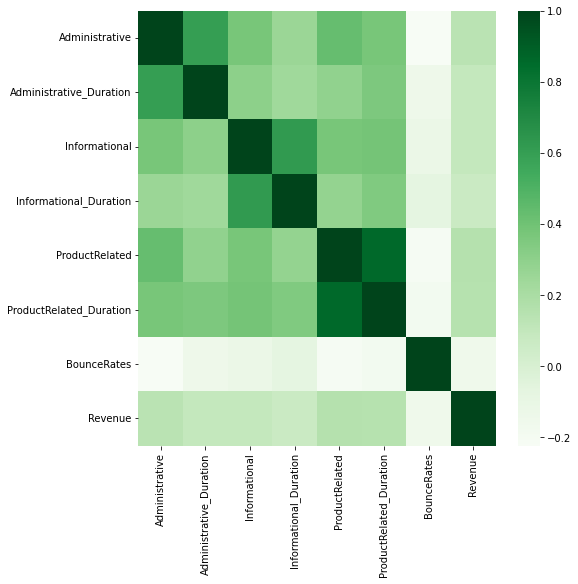

In [180]:
#identificando correlações pelo heat map
plt.figure(figsize=(8, 8))
sns.heatmap(df1.corr(), cmap='Greens');
#sns.heatmap(df2.corr(), cmap='Blues');

In [174]:
# verificação de missing
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  float64
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  float64
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  float64
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   Revenue                  12330 non-null  bool   
dtypes: bool(1), float64(7)
memory usage: 686.5 KB


In [175]:
df1.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
Revenue                    0
dtype: int64

> Não há missing values na base de dados

In [176]:
# distribuição dos dados
df1.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates
count,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04
mean,-2.996612e-17,6.281359e-17,-4.610172e-18,-2.535595e-17,4.610172e-17,-8.298309e-17,-6.454241e-17
std,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00
min,-6.969930e-01,-4.571914e-01,-3.964779e-01,-2.449305e-01,-7.134884e-01,-6.243475e-01,-4.576830e-01
25%,-6.969930e-01,-4.571914e-01,-3.964779e-01,-2.449305e-01,-5.560920e-01,-5.281214e-01,-4.576830e-01
50%,-3.959377e-01,-4.147639e-01,-3.964779e-01,-2.449305e-01,-3.087548e-01,-3.113566e-01,-3.934903e-01
75%,5.072280e-01,7.035981e-02,-3.964779e-01,-2.449305e-01,1.409492e-01,1.407881e-01,-1.109348e-01
max,7.431499e+00,1.876956e+01,1.849960e+01,1.786868e+01,1.513858e+01,3.280678e+01,3.667189e+00


In [168]:
df1.Revenue.value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64

In [181]:
# visualizar a distribuição dos dados para cada variável
df_melt = df1.melt(id_vars=['Revenue', 'BounceRates'])
#df_melt = df1.melt()
df_melt

,Revenue,BounceRates,variable,value
0,False,3.667189,Administrative,-0.696993
1,False,-0.457683,Administrative,-0.696993
2,False,3.667189,Administrative,-0.696993
3,False,0.573535,Administrative,-0.696993
4,False,-0.045196,Administrative,-0.696993
...,...,...,...,...
73975,False,-0.310366,ProductRelated_Duration,0.307822
73976,False,-0.457683,ProductRelated_Duration,-0.380957
73977,False,1.261014,ProductRelated_Duration,-0.528063
73978,False,-0.457683,ProductRelated_Duration,-0.443536


C:\Users\leand\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\leand\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\leand\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\leand\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_

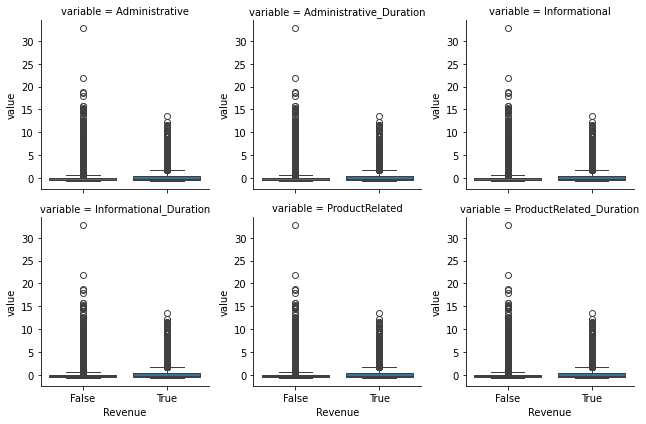

In [182]:
grid = sns.axisgrid.FacetGrid(df_melt[df_melt.variable.isin(df1.columns)], col='variable', col_wrap=3, sharey=False)
grid.map(sns.boxplot,x=df_melt.Revenue,y=df_melt.value, order=None,vert=1);

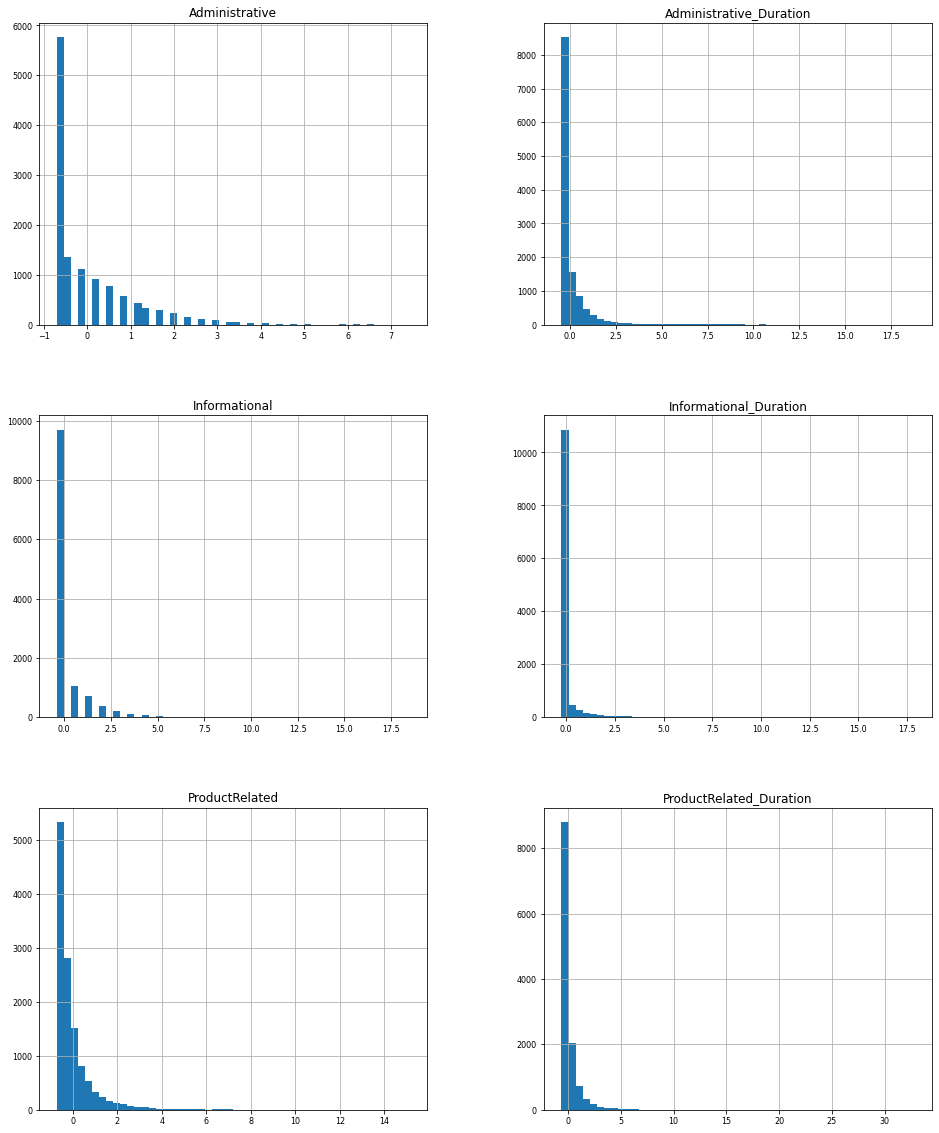

In [183]:
df1[variaveis].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

In [214]:
# método cotovelo

SQD = []
K = range(1,15)
for k in tqdm(K):
    km = KMeans(n_clusters=k)
    km = km.fit(df1[variaveis])
    SQD.append(km.inertia_)
    
SQD

  0%|          | 0/14 [00:00<?, ?it/s]

D:\Arquivos de Programas\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Arquivos de Programas\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Arquivos de Programas\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Arquivos de Programas\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

[73980.00000000007,
 51210.53601671674,
 43201.87923350915,
 37326.49503741665,
 33467.69135300736,
 29688.11021604773,
 26740.414140656416,
 24157.14267734229,
 22505.145621897776,
 21048.901169576282,
 19704.51194532022,
 18857.001906052697,
 18147.208673792586,
 17287.226073243462]

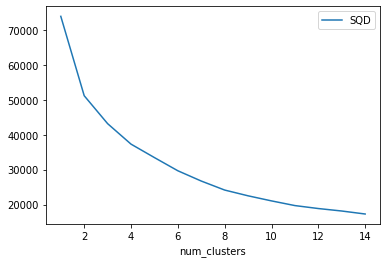

In [215]:
cotovelo = pd.DataFrame({'num_clusters': list(range(1, len(SQD)+1)), 'SQD': SQD})
cotovelo.plot(x = 'num_clusters', y = 'SQD');

In [216]:
# método Silhueta
# Inicializar uma lista vazia que vai conter os valores da silueta média
siluetas = []
# Este é o número máximo de grupos que vamos testar
max_clusters = 10

# O loop percorre de 2 até o máximo de clusters
for n_clusters in tqdm(range(2, max_clusters+1)):
    # Aqui rodamos o k-means
    km = KMeans(n_clusters=n_clusters).fit(df1[variaveis])
    # Aqui calculamos a silueta e guardamos o resultado na lista 'siluetas'
    siluetas.append(silhouette_score(df1[variaveis], km.labels_))
    # Essa list comprehendion define o nome dos grupos
    nomes_grupos = ['grupo_' + str(g) for g in range(n_clusters)]
    # Agora vamos adicionar uma coluna no dataframe X_pad com o agrupamento construido
    df1['grupos_'+str(n_clusters)] = pd.Categorical.from_codes(km.labels_, categories = nomes_grupos)

  0%|          | 0/9 [00:00<?, ?it/s]

D:\Arquivos de Programas\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Arquivos de Programas\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Arquivos de Programas\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Arquivos de Programas\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

<Axes: xlabel='n_clusters'>

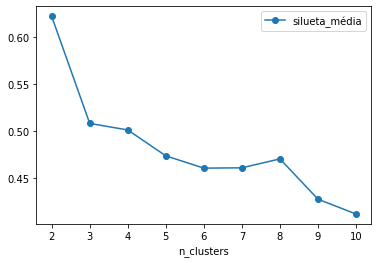

In [217]:
df_silueta = pd.DataFrame({'n_clusters': list(range(2, max_clusters+1)), 'silueta_média': siluetas})

df_silueta.plot.line(x = 'n_clusters', y = 'silueta_média', marker='o')
# plt.scatter(x = df_silueta.n_clusters, y = df_silueta.silueta_média)

## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

> É possível perceber que a quantidade de grupos "ótima" seria 3. A curva no gráfico do método de silhueta, sofre uma alteração muito grande na inclinação quando chega a 3.

In [203]:
#separando a variável Bounce Rates para não entrar na análise
b = df1['BounceRates']
b

0        3.667189
1       -0.457683
2        3.667189
3        0.573535
4       -0.045196
           ...   
12325   -0.310366
12326   -0.457683
12327    1.261014
12328   -0.457683
12329   -0.457683
Name: BounceRates, Length: 12330, dtype: float64

In [211]:
df1.drop('BounceRates', axis = 'columns', inplace = True)

In [218]:
df1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,Revenue,grupos_2,grupos_3,grupos_4,grupos_5,grupos_6,grupos_7,grupos_8,grupos_9,grupos_10
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,False,grupo_1,grupo_0,grupo_0,grupo_1,grupo_0,grupo_0,grupo_4,grupo_0,grupo_0
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,False,grupo_1,grupo_0,grupo_0,grupo_1,grupo_0,grupo_0,grupo_4,grupo_0,grupo_0
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,False,grupo_1,grupo_0,grupo_0,grupo_1,grupo_0,grupo_0,grupo_4,grupo_0,grupo_0
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,False,grupo_1,grupo_0,grupo_0,grupo_1,grupo_0,grupo_0,grupo_4,grupo_0,grupo_0
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,False,grupo_1,grupo_0,grupo_0,grupo_1,grupo_0,grupo_0,grupo_4,grupo_0,grupo_0


<ipython-input-223-d37d67be15a9>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax = df1.groupby(['grupos_3','Revenue'])['Revenue'].count().unstack().plot.bar()


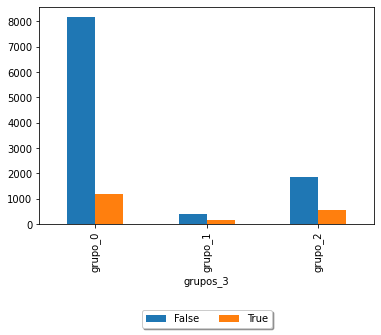

In [223]:
#avaliando se os possíveis agrupamentos têm resultados tão discrepantes

ax = df1.groupby(['grupos_3','Revenue'])['Revenue'].count().unstack().plot.bar()

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -.5),
          ncol=3, fancybox=True, shadow=True);

# 3 grupos parece ser a melhor opção

C:\Users\leand\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\leand\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


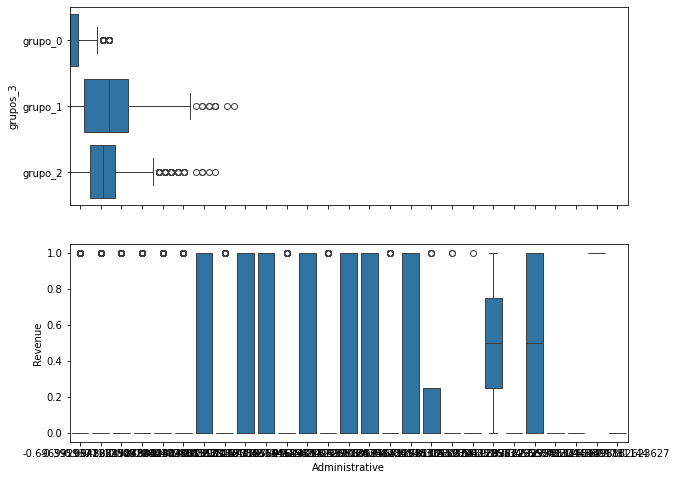

In [229]:
# visualização da distribuição quando em relação as possíbilidades de agrupamentos
def dataviz_grupos(varx, varg):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10, 8))

    sns.boxplot(data=df1, y=varg, x=varx, ax=ax[0])
    sns.boxplot(data=df1, y='Revenue', x=varx, ax=ax[1])
    plt.show()

dataviz_grupos(variaveis[0], 'grupos_3')

<ipython-input-237-1d2fdc422b0b>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax.plot(df1.groupby(['grupos_3'])[variaveis].mean().apply(padroniza), 'o ')


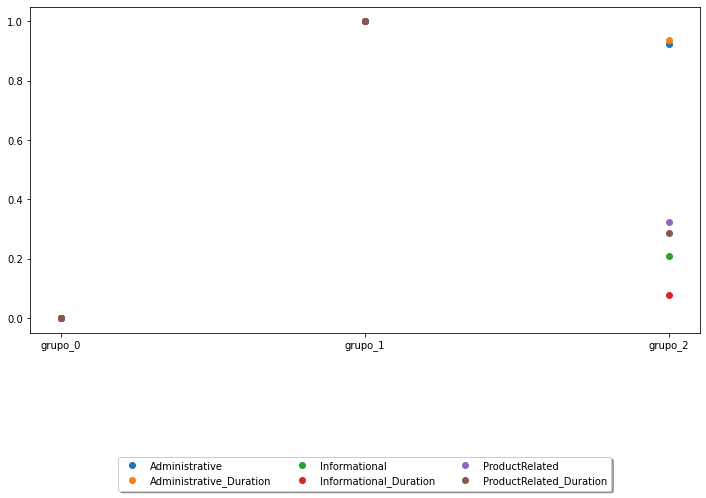

In [237]:
# avaliar segundo a maior médias de cada variável em cada grupo

padroniza = lambda x: (x - x.min())/(x.max() - x.min())

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df1.groupby(['grupos_3'])[variaveis].mean().apply(padroniza), 'o ')
ax.legend(variaveis, loc='lower center', bbox_to_anchor=(0.5, -.5),
          ncol=3, fancybox=True, shadow=True)

In [235]:
pd.crosstab(df1['Revenue'], df1['grupos_3'])

grupos_3,grupo_0,grupo_1,grupo_2
Revenue,,,
False,8169,378,1875
True,1168,167,573


C:\Users\leand\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\leand\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\leand\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\leand\A

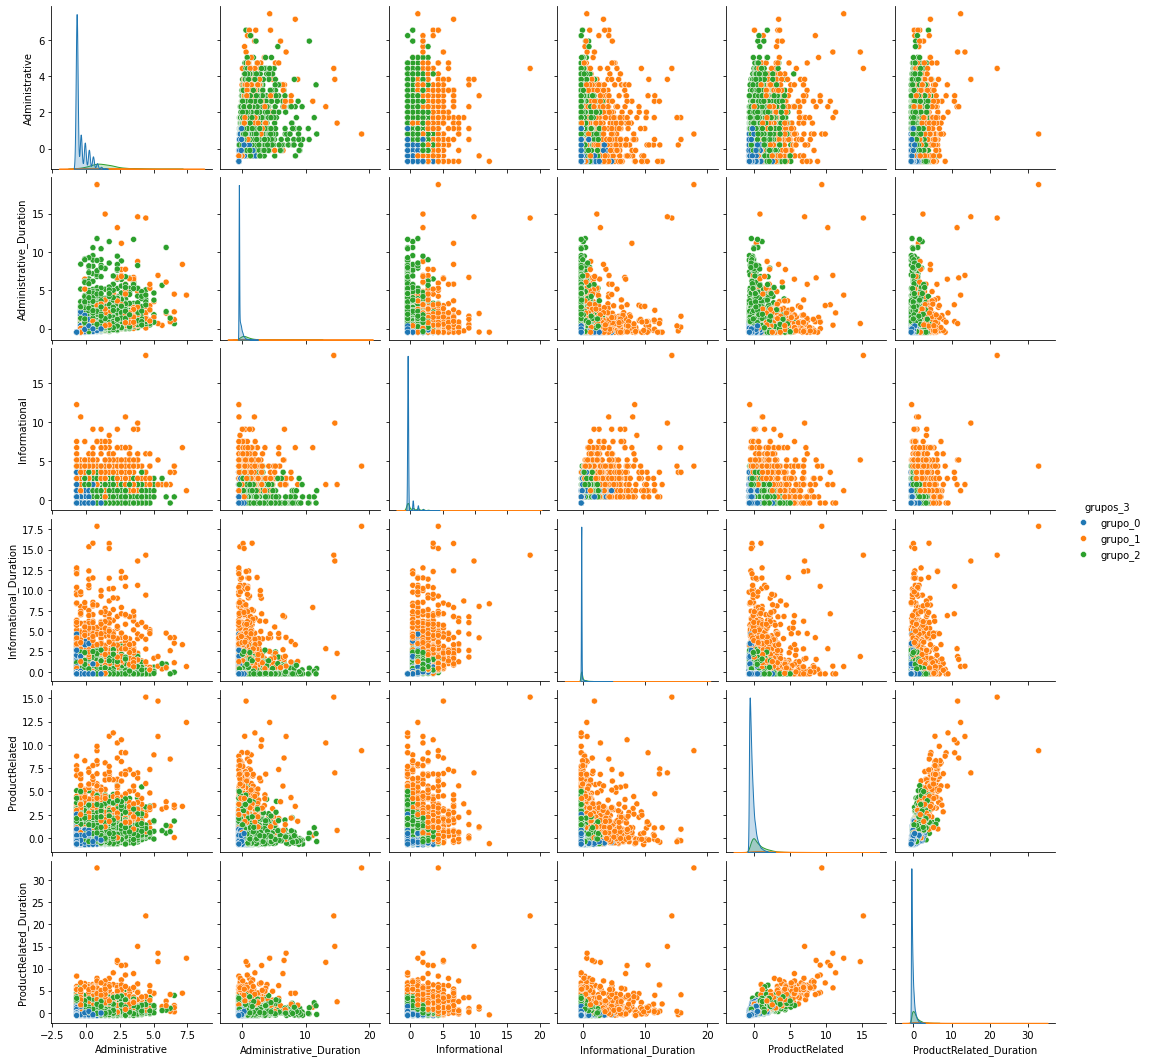

In [238]:
n_clusters = 3
var_grupo = 'grupos_' + str(n_clusters)
sns.pairplot(df1[variaveis + [var_grupo]], hue=var_grupo)

In [247]:
pca = PCA(n_components=2)
componentes = pca.fit_transform(df1[variaveis])

In [240]:
def biplot(score,coeff, y, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 2/(xs.max() - xs.min())
    scaley = 2/(ys.max() - ys.min())
    
    fig, ax = plt.subplots(figsize=(10, 10))
#     scatter = ax.scatter(xs * scalex,ys * scaley, c = y)
    sns.kdeplot(x = xs * scalex, y = ys * scaley, hue=y, ax=ax, fill=True, alpha=.6, palette='viridis')
#     ax.legend(*scatter.legend_elements())
    
    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5, 
                 length_includes_head=True, head_width=0.04, head_length=0.04)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'k', ha = 'center', va = 'center')
    ax.set_xlim(-1.2,1.2)
    ax.set_ylim(-1.2,1.2)
    ax.set_xlabel("PC{0}, {1:.1%} da variância explicada".format(1, pca.explained_variance_ratio_[0]))
    ax.set_ylabel("PC{0}, {1:.1%} da variância explicada".format(1, pca.explained_variance_ratio_[1]))
    ax.grid()


#Call the function. Use only the 2 PCs.

C:\Users\leand\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\leand\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\leand\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


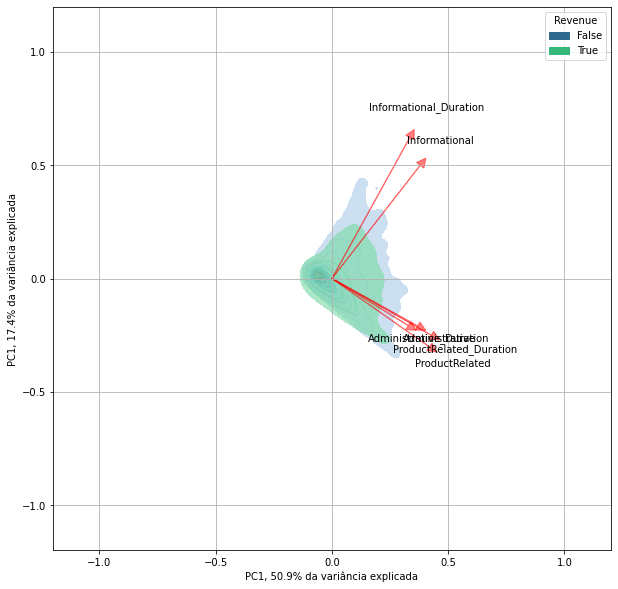

In [245]:
biplot(componentes,
       np.transpose(pca.components_[0:2, :]), 
       df1['Revenue'],
       labels = variaveis)
plt.show()

C:\Users\leand\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\leand\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\leand\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


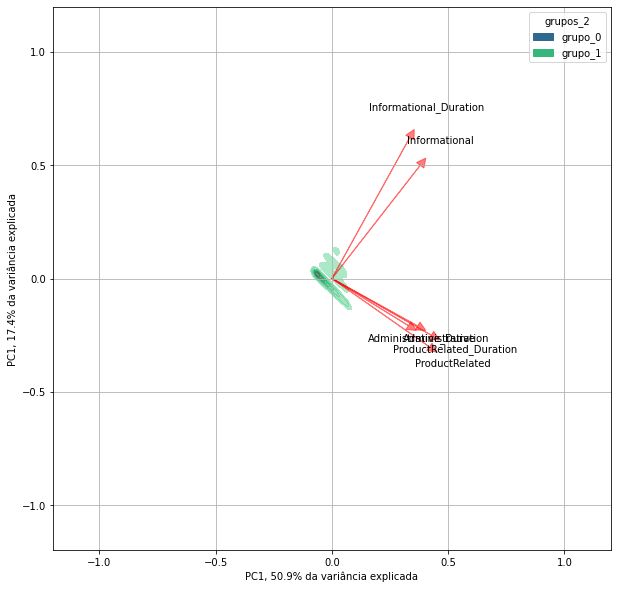

In [249]:
biplot(componentes,
       np.transpose(pca.components_[0:2, :]), 
       df1['grupos_2'],
       labels = variaveis)
plt.show()

**Conclusões preliminares**

> Parece que o ```grupo_0``` e ```grupo_1``` as variáveis todas se localizam em posições muito próximas, parece não restar muita variabilidade de médias. No ```grupo_0``` as max médias estão muito próximas de 0, enquanto que, no ```grupo_1``` as médias máximas todas estão mais próximas a 1.

> Já no ```grupo_2``` parece haver uma variabilidade maior da média máxima das variáveis. no entanto, elas acabam por se concentrar em dois grupos:a) entre 0 e 0.4; b) acima de 0.8.

> Muito estranho, mas as variáveis do ```grupo_0```estão contidas no grupo ```grupo_1```. É como se não houvese tanta separação entre eles

**Proposição de nomes de grupos**

| GRUPO | NOME | DESCRIÇÃO BÁSICA |
|-  |-  |-  |
|```grupo_0``` | "Surfistas socráticos"   | Clientes que parecem navegar bastante nos sites de compra mas uma parcela muito pequena compra algo de fato. |
|```grupo_1``` | "Maximizadores de tempo" | Clientes que tendem a navegar pouco para obter o que necessitam. Ou compram compulsivamente ou sabem o que querem desde o princípio. |
|```grupo_2``` | "Humano moderno"         | Clientes que usam a internet com uma certa frequência ao longo do dia, seja por curiosidade ou por hiperlink das redes sociais, parecem eventualmente entrar na página e adquirir algo que os interesse. |

In [314]:
grupos = {'grupo_0':"Surfistas socráticos", 'grupo_1':"Maximizadores de tempo", 'grupo_2':"Humano moderno",}
df1['g3_nomes'] = df1['grupos_3'].map(grupos)
df1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,Revenue,grupos_2,grupos_3,grupos_4,grupos_5,grupos_6,grupos_7,grupos_8,grupos_9,grupos_10,BounceRates,br_class,g3_nomes
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,False,grupo_1,grupo_0,grupo_0,grupo_1,grupo_0,grupo_0,grupo_4,grupo_0,grupo_0,3.667189,large rate,Surfistas socráticos
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,False,grupo_1,grupo_0,grupo_0,grupo_1,grupo_0,grupo_0,grupo_4,grupo_0,grupo_0,-0.457683,small rate,Surfistas socráticos
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,False,grupo_1,grupo_0,grupo_0,grupo_1,grupo_0,grupo_0,grupo_4,grupo_0,grupo_0,3.667189,large rate,Surfistas socráticos
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,False,grupo_1,grupo_0,grupo_0,grupo_1,grupo_0,grupo_0,grupo_4,grupo_0,grupo_0,0.573535,large rate,Surfistas socráticos
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,False,grupo_1,grupo_0,grupo_0,grupo_1,grupo_0,grupo_0,grupo_4,grupo_0,grupo_0,-0.045196,large rate,Surfistas socráticos


## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

In [266]:
# Quando fui criar as categorias para melhor analisar a variável BounceRates, descobri a presençca de duplicatas e o qcut() não rodou.
print(df.duplicated().value_counts())
print(df1.duplicated().value_counts())
print(df2.duplicated().value_counts())

False    12205
True       125
Name: count, dtype: int64
False    11466
True       864
Name: count, dtype: int64
False    11466
True       864
Name: count, dtype: int64


> Originalmente, parecem ser apenas 125 dados duplicados. No entanto, quando removidas as variáveis que não são interessantes para a análise, o número aumenta pois os dados passam a não terem mais o sentido completo sem as variáveis removidas.

In [329]:
# criei as categorias e 
df1['br_class'] = pd.qcut(df1.BounceRates, q=4,
                       labels = [
                                 'small rate',
                                 'medium rate',
                                 'large rate',
                                 ],
                       duplicates = 'drop') # usei esta linha pra ignorar as duplicatas

df1.br_class.value_counts()

br_class
small rate     6165
large rate     3083
medium rate    3082
Name: count, dtype: int64

In [315]:
pd.crosstab(df1['br_class'], df1['g3_nomes'])

g3_nomes,Surfistas socráticos,Maximizadores de tempo,Humano moderno
br_class,,,
small rate,4769,205,1191
medium rate,1776,293,1013
large rate,2792,47,244


In [316]:
pd.crosstab(df1['Revenue'], df1['g3_nomes'])

g3_nomes,Surfistas socráticos,Maximizadores de tempo,Humano moderno
Revenue,,,
False,8169,378,1875
True,1168,167,573


In [298]:
pd.crosstab(df1['br_class'], df1['Revenue'])

Revenue,False,True
br_class,,
small rate,4961,1204
medium rate,2522,560
large rate,2939,144


#### Conclusões

- Os ```Maximizadores de tempo``` parecem ser o que melhor grupo propensos a compra. Comparativamente, têm a menor quantidade de membros, mas tem uma frequência maior de compras efetuadas, bem como parecem ficar pouco tempo no site sem usarem nada além da compra.